### Домашнее задание по теме «Ансамблирование»
Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)  
Построить случайный лес, вывести важность признаков  
Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную  
В качестве решения: Jupyter notebook с кодом, комментариями и графиками  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'9_Ансамблирование\train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# отберем категориальные признаки для заполнения пропусков 
cat_feat = list(data.dtypes[data.dtypes == object].index)

# заполним пропущенные значения nan
data[cat_feat] = data[cat_feat].fillna('nan')

In [5]:
# Находим категориальные признаки float, так как в них есть пропуски
num_feat = list(data.dtypes[data.dtypes == float].index)
num_feat

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [6]:
# рассмотри признаки, чтобы определить каким значение заполнить пропуски
data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [7]:
# пропуски так как их много заполним специальным значением
data[num_feat] = data[num_feat].fillna(-999)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

пропусков больше нет

In [9]:
# Создаём дамми-переменные для категориальных признаков
dummy = pd.get_dummies(data[cat_feat], columns=cat_feat)

In [19]:
# Разбиваем данные
from sklearn.model_selection import train_test_split 

X = pd.concat([data[num_feat], dummy], axis = 1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

Создаём random_forest, для оценки качества используем 15-fold КВ.

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

rf = RandomForestRegressor()
kf = KFold(n_splits = 15)
scores = cross_val_score(rf, X_train, y_train, cv = kf)
scores.mean(), scores

(0.7389388722352973,
 array([0.87380808, 0.71903634, 0.74779661, 0.68384645, 0.73666533,
        0.80251943, 0.76927041, 0.72795985, 0.67059721, 0.70389765,
        0.66349173, 0.77274722, 0.75689481, 0.70961639, 0.74593558]))

модель показала результат 0,739 
выведем ключевые признаки

<function matplotlib.pyplot.show(close=None, block=None)>

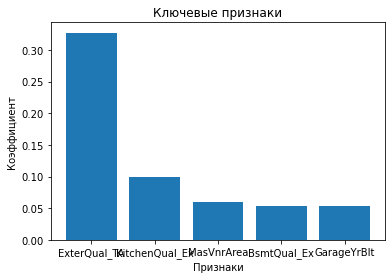

In [21]:
rf.fit(X_train, y_train)
f_imp = pd.Series(rf.feature_importances_)
f_imp.index = pd.Series(X_train.columns)
plt.title('Ключевые признаки')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент')
plt.bar(f_imp.sort_values(ascending=False).head().index, f_imp.sort_values(ascending=False).head())
plt.show

Обучим стекинг моделей

In [22]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [23]:
sr = StackingRegressor(
                    [
                        ('lr', LinearRegression()),
                        ('kn', KNeighborsRegressor()),
                        ('dt', DecisionTreeRegressor())
                    ], RidgeCV()
                    )

sr.fit(X_train, y_train)

for est in sr.estimators_:
    print('{} : {}'.format(est, est.score(X_test, y_test)))
    
print('Stacking Regressor: {}'.format(sr.score(X_test, y_test)))

LinearRegression() : 0.744070766492468
KNeighborsRegressor() : 0.41331377426423777
DecisionTreeRegressor() : 0.5620969862015227
Stacking Regressor: 0.7380972932959791


Линейная регрессия показала лучший результат среди остальных, следом с небольшим отставанием ансамблевая модель. Метод k-ближайших показал худшую точность, не сильно лучше результаты у модели на основе дерева решений. 